# Extraction of HOG features

In [1]:
#importing required packages
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)


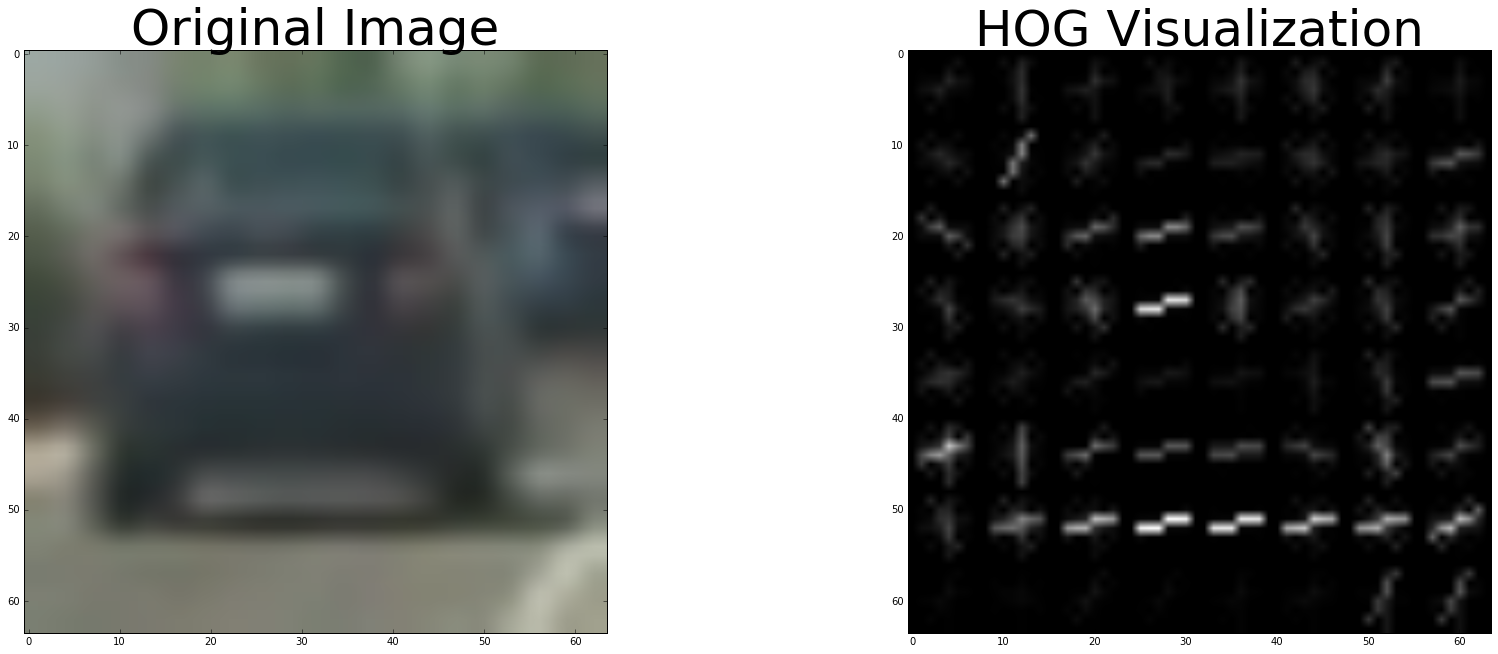

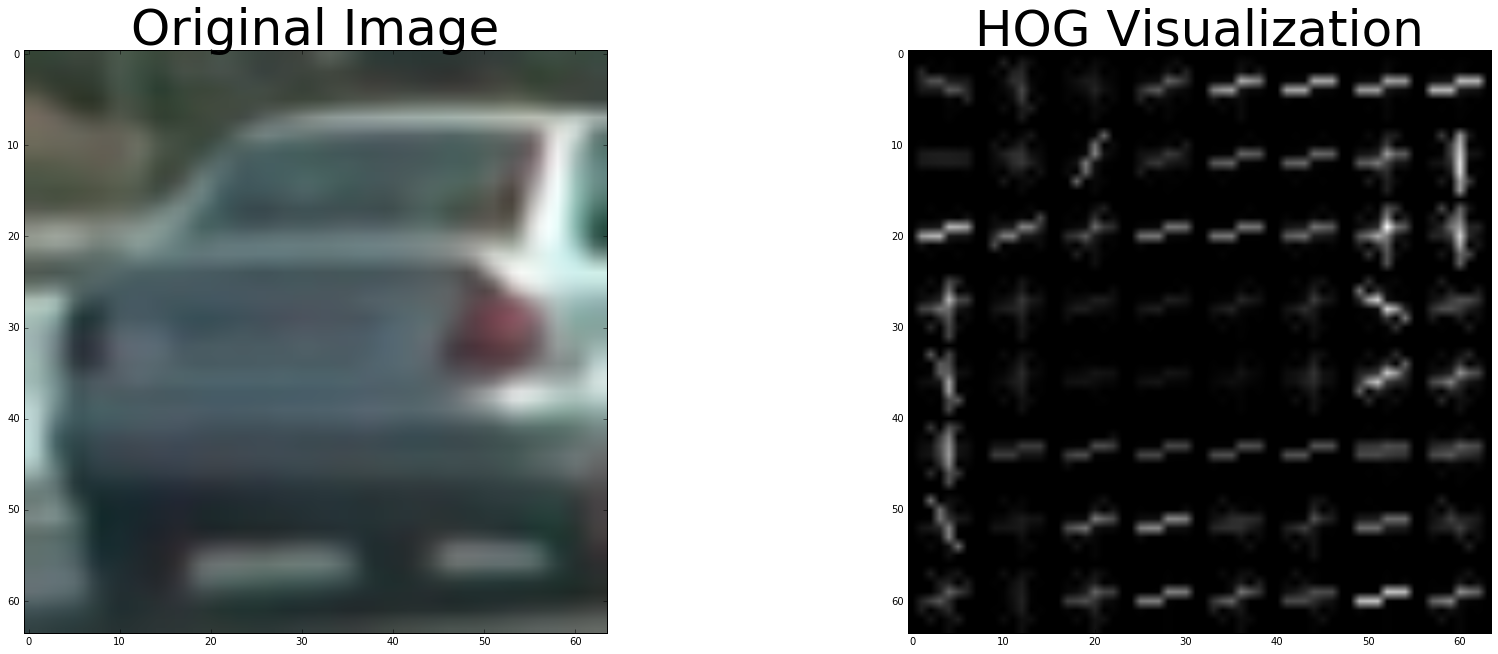

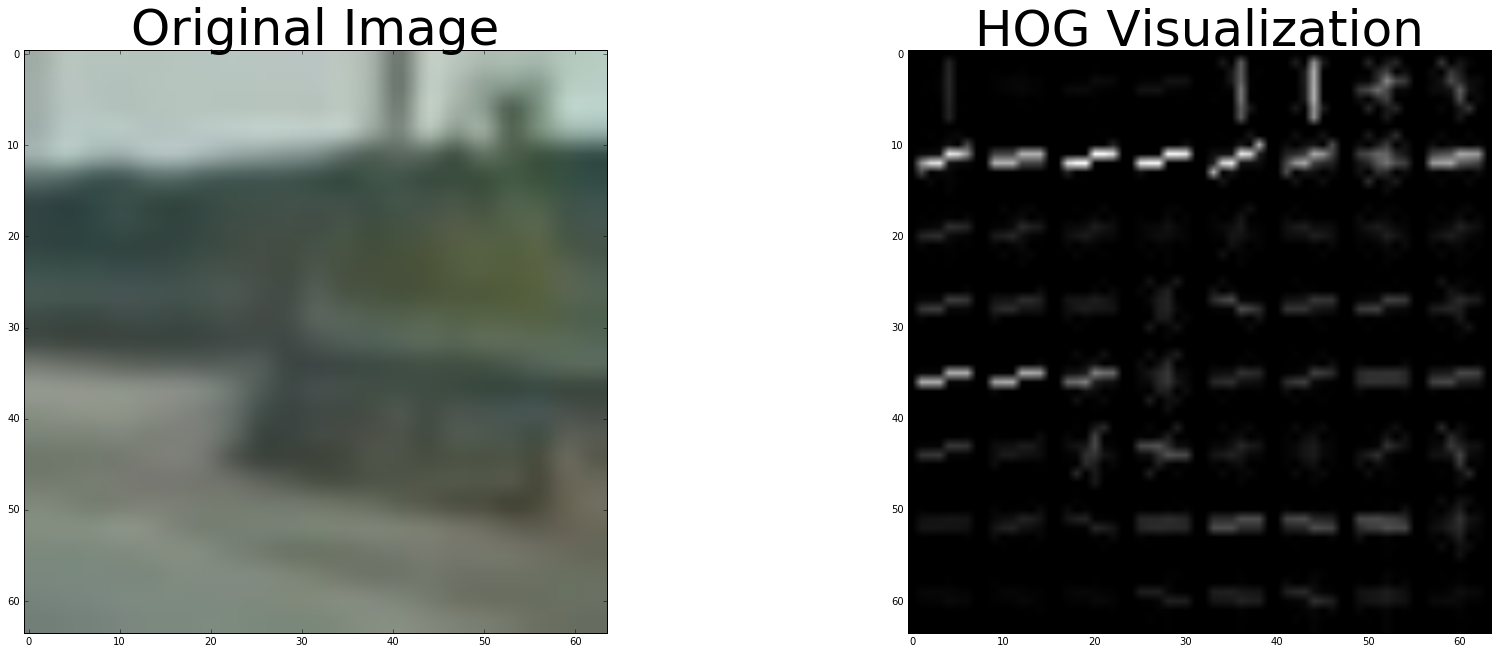

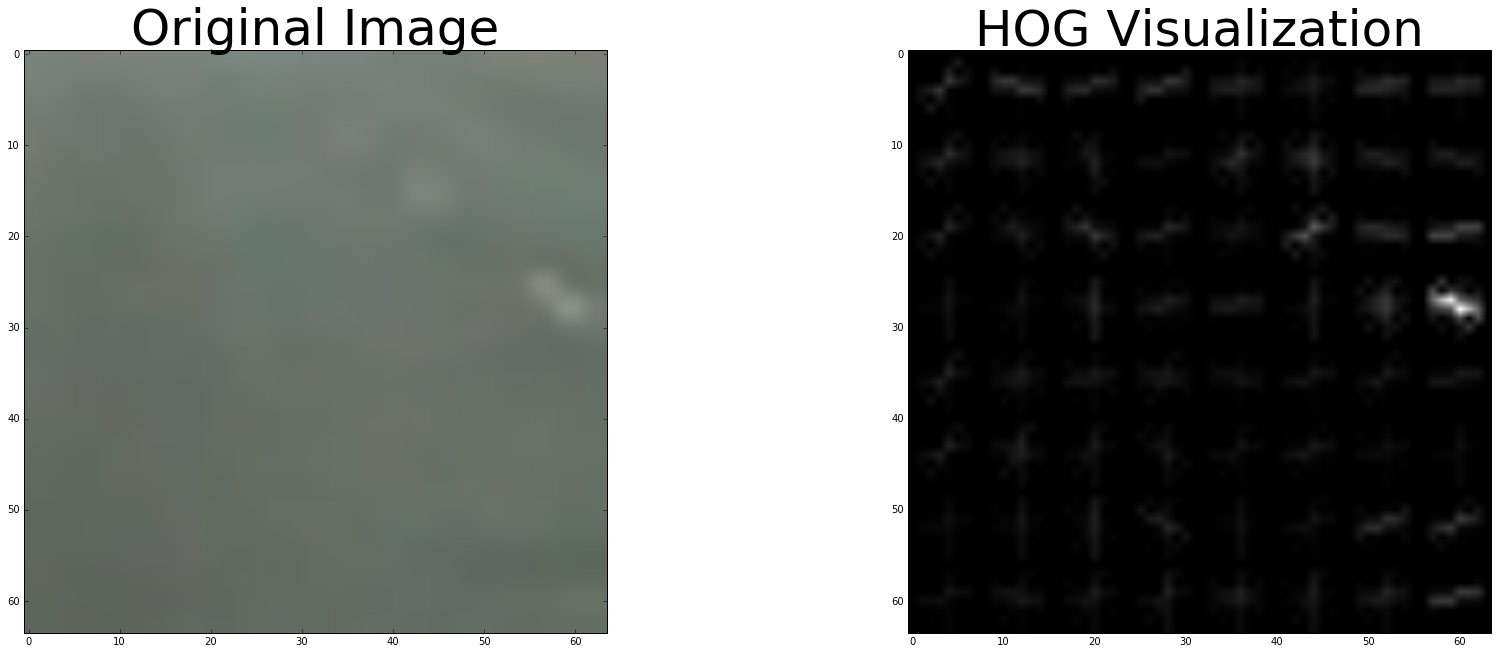

In [2]:
%matplotlib inline

#read an image and compute hog features
img = mpimg.imread("vehicles/GTI_Far/image0000.png")

orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_features, hog_image = get_hog_features(img[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)


#plot both the original and HOG features
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG Visualization', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.figure()
img = mpimg.imread("vehicles/GTI_Left/image0009.png")

orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_features, hog_image = get_hog_features(img[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)


#plot both the original and HOG features
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG Visualization', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.figure()
img = mpimg.imread("non-vehicles/GTI/image10.png")

orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_features, hog_image = get_hog_features(img[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)


#plot both the original and HOG features
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG Visualization', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


plt.figure()
img = mpimg.imread("non-vehicles/GTI/image1.png")

orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_features, hog_image = get_hog_features(img[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)


#plot both the original and HOG features
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG Visualization', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Classifier for HOG feature

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 1764
13.64 Seconds to train SVC...
Test Accuracy of SVC =  0.942


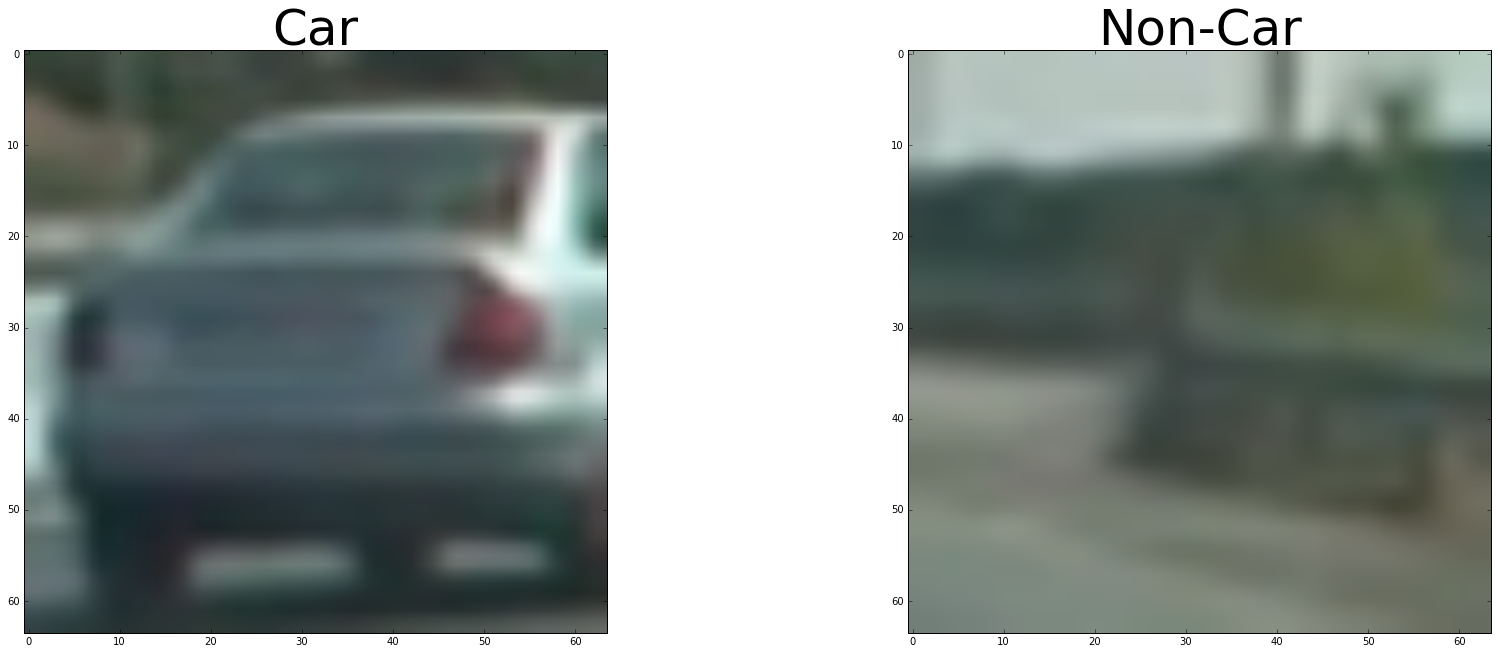

In [3]:
#Read vehicle and non-vehicle images and compute their features
car = glob.glob('vehicles/*/*.png')
noncar = glob.glob('non-vehicles/*/*.png')


car_feature = []
noncar_feature = []
for image in car:
    image = mpimg.imread(image)
    hog_carfeature = get_hog_features(image[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
    car_feature.append(hog_carfeature)
    
for image in noncar:
    image = mpimg.imread(image)
    hog_noncarfeature = get_hog_features(image[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
    noncar_feature.append(hog_noncarfeature)
    

X = np.vstack((car_feature, noncar_feature)).astype(np.float64)                        

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_feature)), np.zeros(len(noncar_feature))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()

# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))



car_img = mpimg.imread("vehicles/GTI_Left/image0009.png")

noncar_img = mpimg.imread("non-vehicles/GTI/image10.png")

plt.figure()
#plot both the car and non-car images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(car_img)
ax1.set_title('Car', fontsize=50)
ax2.imshow(noncar_img)
ax2.set_title('Non-Car', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# SLIDING WINDOW IMPLEMENTATION

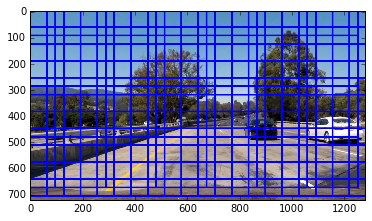

In [4]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


#read and image and diplay sliding windows
img_with_windows = mpimg.imread("test_images/test1.jpg")
for i in range(2,4):
    windows = slide_window(img_with_windows, x_start_stop=[None, None], y_start_stop=[None, None], 
                            xy_window=(64*i, 64*i), xy_overlap=(0.5, 0.5))
                       
    img_with_windows = draw_boxes(img_with_windows, windows, color=(0, 0, 255), thick=6)                    
plt.figure()
plt.imshow(img_with_windows)

# Finding Cars

In [5]:
#import libraries need for classifier
from sklearn import svm, grid_search

#Parameters to fine tune.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

#calculate multiple features using extract_features
car = glob.glob('vehicles/*/*.png')
noncar = glob.glob('non-vehicles/*/*.png')


car_feature = extract_features(car, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

noncar_feature = extract_features(noncar, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    

X = np.vstack((car_feature, noncar_feature)).astype(np.float64)                        

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_feature)), np.zeros(len(noncar_feature))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a grid search to get the best classifier
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
svc = grid_search.GridSearchCV(svr, parameters)

# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    bboxes = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img,bboxes


Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
3307.87 Seconds to train SVC...
Test Accuracy of SVC =  0.9955


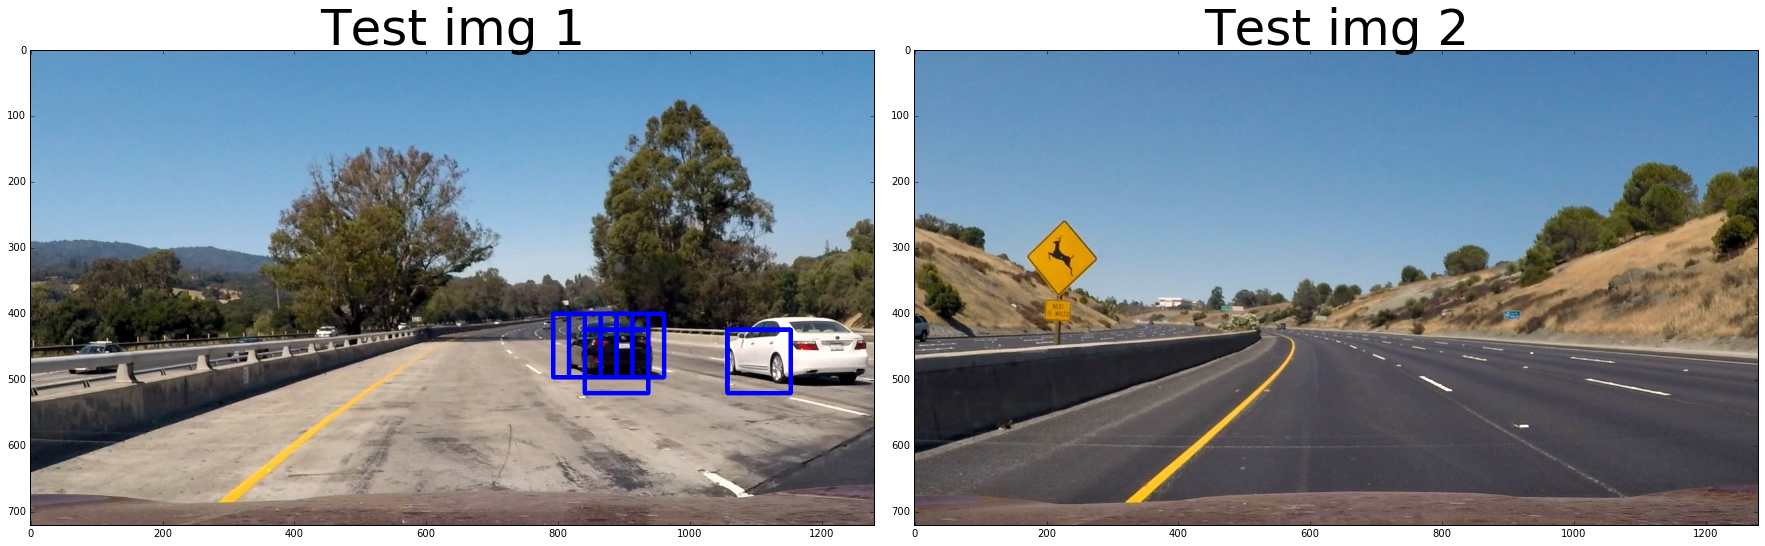

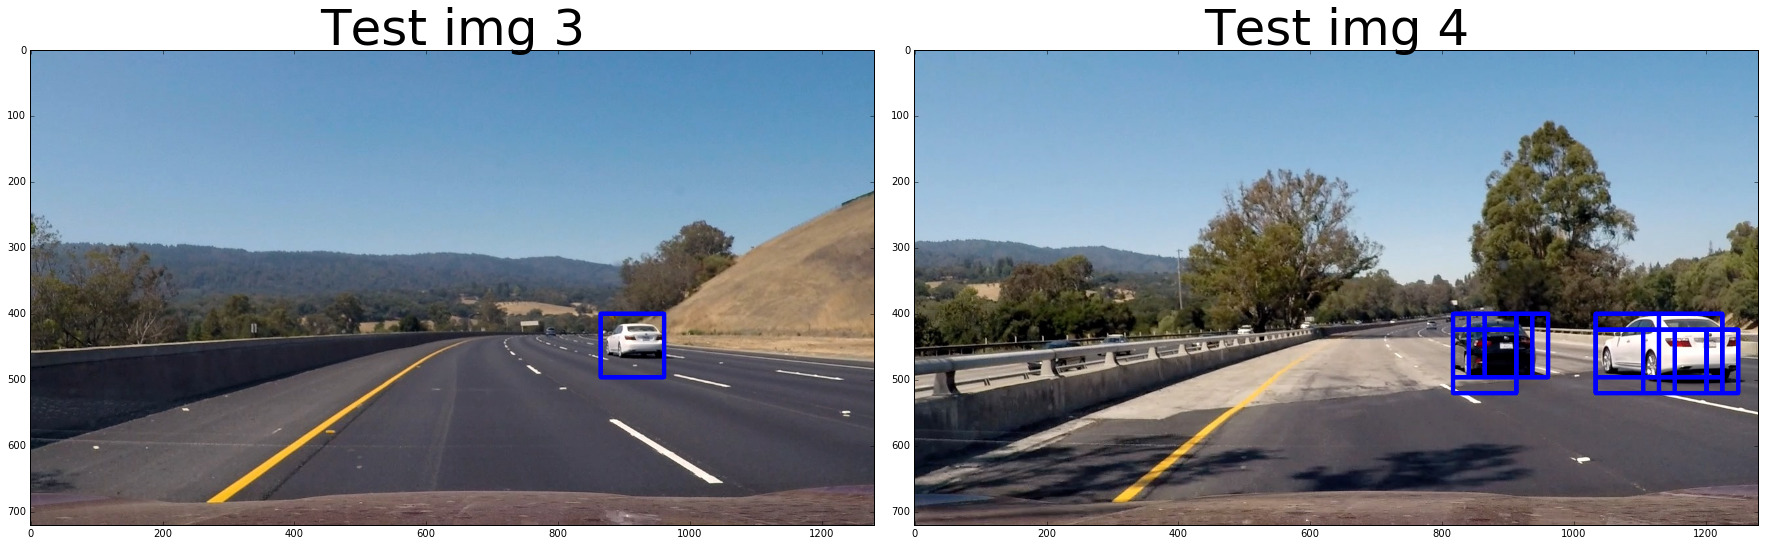

In [6]:
ystart = 400
ystop = 656
scale = 1.5

#Read images and find car positions
test1 = mpimg.imread("test_images/test1.jpg")
out_img1,bboxes1 = find_cars(test1, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
test2 = mpimg.imread("test_images/test2.jpg")
out_img2,bboxes2 = find_cars(test2, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


plt.figure()
#plot the outputs of find_cars
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(out_img1)
ax1.set_title('Test img 1', fontsize=50)
ax2.imshow(out_img2)
ax2.set_title('Test img 2', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


test3 = mpimg.imread("test_images/test3.jpg")
out_img3,bboxes3 = find_cars(test3, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
test4 = mpimg.imread("test_images/test4.jpg")
out_img4,bboxes4 = find_cars(test4, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(out_img3)
ax1.set_title('Test img 3', fontsize=50)
ax2.imshow(out_img4)
ax2.set_title('Test img 4', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Heat map

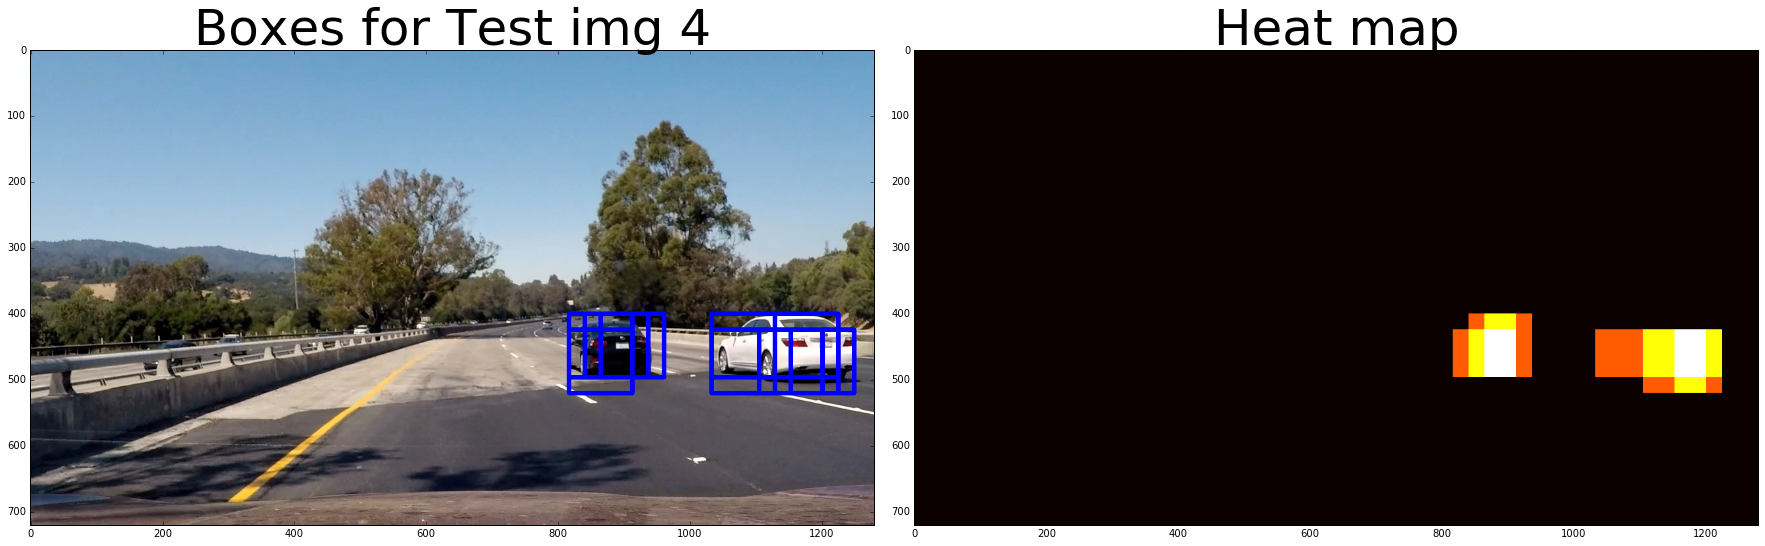

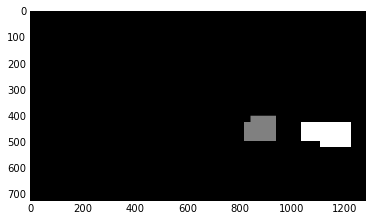

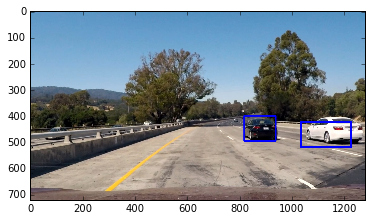

In [7]:
#import packages to perform labeling
from scipy.ndimage.measurements import label

#Function to add heat to the box regions
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes

#Function to apply threshold to heatmap regions
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

#Function to draw the final labeled boxes on the frame
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    boxes = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        boxes.append(bbox)
    # Return te image
    return img, boxes

heat = np.zeros_like(test4[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,bboxes4)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img,boxes = draw_labeled_bboxes(np.copy(test1), labels)

plt.figure()
#plot both the box images and heatmap
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(out_img4)
ax1.set_title('Boxes for Test img 4', fontsize=50)
ax2.imshow(heatmap,cmap='hot')
ax2.set_title('Heat map', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#plot labels
plt.figure()
plt.imshow(labels[0], cmap='gray')

#plot final output
plt.figure()
plt.imshow(draw_img)


In [21]:
#function to perform combined processing
def combined_processing(image):
    global previous_bboxes
    global pre_previous_bboxes
    
    #find cars in the frame
    out_img,bboxes = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    #Read in image similar to one shown above 
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for box in pre_previous_bboxes:
        bboxes.append(box)
    
    pre_previous_bboxes = []
    
    for box in previous_bboxes:
        bboxes.append(box)
        pre_previous_bboxes.append(box)
    #Add heat to each box in box list
    #print(len(previous_bboxes),len(bboxes),heat.shape) 
    heat = add_heat(heat, bboxes)
    previous_bboxes = []

    #Apply threshold to help remove false positives
    heat = apply_threshold(heat, 2)

    #Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    #Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img,boxes = draw_labeled_bboxes(np.copy(image), labels)
    for box in boxes:
        previous_bboxes.append(box)
    #print(len(previous_bboxes),len(boxes)) 
        #print(previous_bboxes,heat.shape)

    return draw_img

In [22]:
#import packages to perform video editing
from moviepy.editor import VideoFileClip
previous_bboxes = []
pre_previous_bboxes = []
#create the output video with boxes over found cars
project_output_file = "project_output.mp4"
project_video = VideoFileClip("project_video.mp4")

project_output = project_video.fl_image(combined_processing)
%time project_output.write_videofile(project_output_file, audio=False)

[MoviePy] >>>> Building video project_output.mp4
[MoviePy] Writing video project_output.mp4


100%|███████████████████████████████████▉| 1260/1261 [2:45:01<00:07,  7.32s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output.mp4 

Wall time: 2h 45min 4s


In [23]:
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output_file))